<a href="https://colab.research.google.com/github/mazkanataru/Mubarakova-Aruzhan-Software-Packages-for-Data-Analysis/blob/problem4/twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SOURCE
https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment

In [ ]:
! unzip -o /content/Tweets.zip

Archive:  /content/Tweets.zip
  inflating: Tweets.csv              


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('/content/Tweets.csv')
df.head(5)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [ ]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

<Axes: >

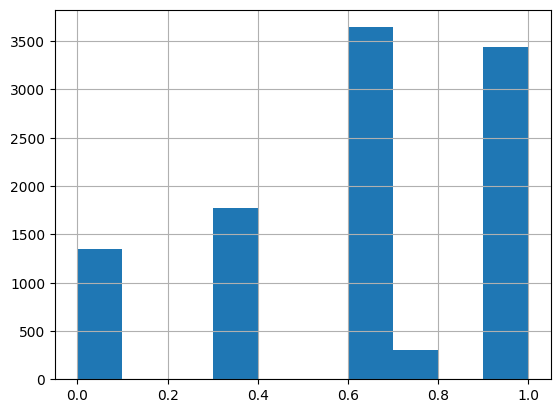

In [ ]:
df['negativereason_confidence'].hist()
#we can see how many users just confidence in their opinions

<Axes: >

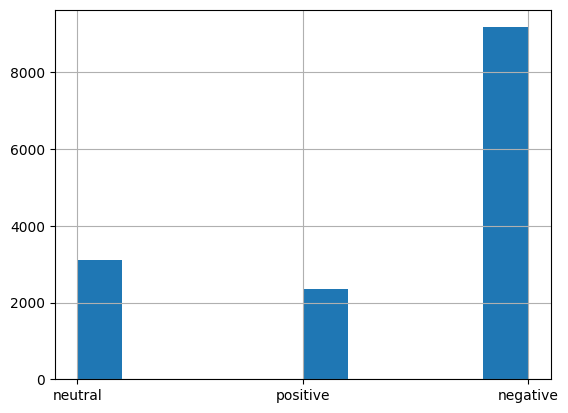

In [ ]:
df['airline_sentiment'].hist()
#here we can see how many of their reviews are positive, neutral or negative(which is the most of reviews)

#airline_sentiment_confidence

<Axes: >

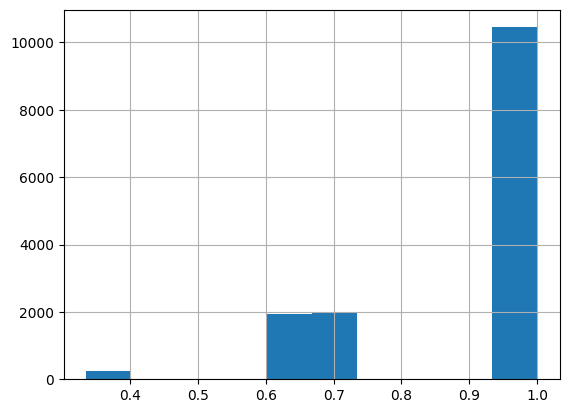

In [ ]:
df['airline_sentiment_confidence'].hist()
#and how many of their views are confident

#'Distribution of causes of negative mood

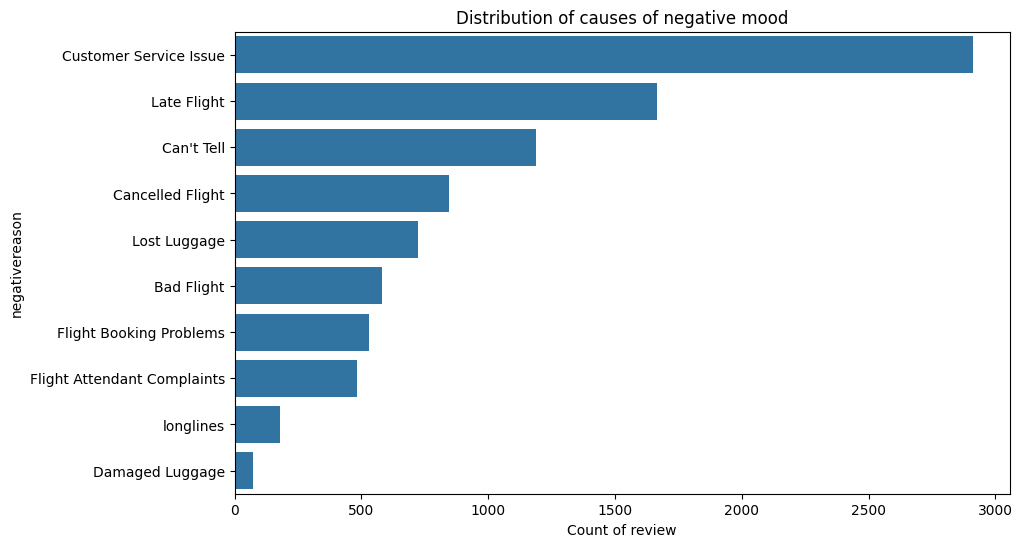

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y='negativereason', data=df, order=df['negativereason'].value_counts().index)
plt.title('Distribution of causes of negative mood')
plt.xlabel('Count of review')
plt.show()
#here we can find out what is the main reason of their negative reasons/moods

#Confidence in the reasons for negative mood

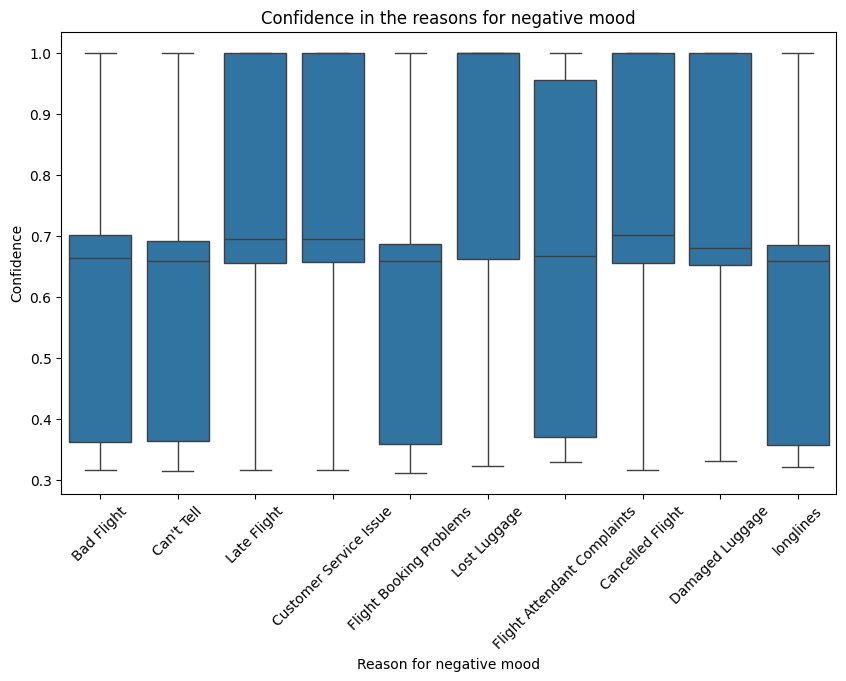

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='negativereason', y='negativereason_confidence', data=df)
plt.title('Confidence in the reasons for negative mood')
plt.xlabel('Reason for negative mood')
plt.ylabel('Confidence')
plt.xticks(rotation=45)
plt.show()
#here we can find out that most of negative reason as Late Flight,Service issue, Lost lugguage, Cancelled Flight havemore confidence fpr users to mark it like 'sure'
#while for longiness and bad flight they dont actually sure. and it is relatable i think

tweet_created

In [ ]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'])
df['hour'] = df['tweet_created'].dt.hour
df['day_of_week'] = df['tweet_created'].dt.dayofweek
df['month'] = df['tweet_created'].dt.month


<Axes: >

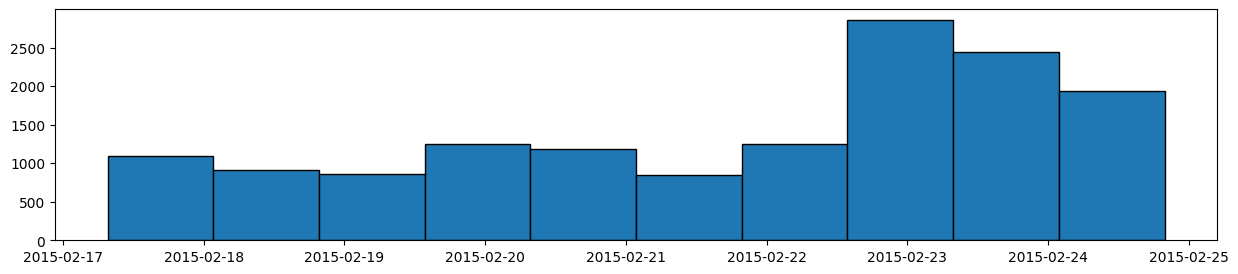

In [ ]:
import matplotlib.pyplot as plt

#specify figure size (width, height)
fig = plt.figure(figsize=(15,3))
ax = fig.gca()

df['tweet_created'].hist(grid=False, edgecolor='black', ax=ax)
#maybe their reason depends on some special date i guessed, but i dont think so, after research
#on net 'what could happen in Boston or in whole America in 2015-02-23' but i than i found out that count
#of reviews is ≈ 35 so i guess...it doesnt make any sense



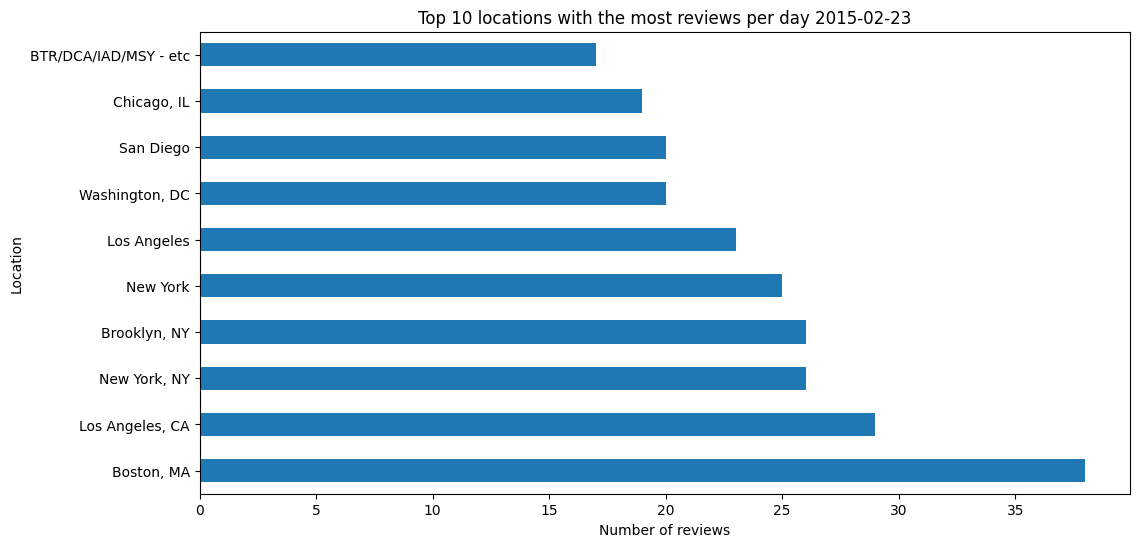

In [ ]:
# tried to select date 2015-02-23

df['tweet_created'] = pd.to_datetime(df['tweet_created'])

selected_day_df = df[df['tweet_created'].dt.date == pd.to_datetime('2015-02-23').date()]

location_counts = selected_day_df['tweet_location'].value_counts()

top_locations = location_counts.head(10)


plt.figure(figsize=(12, 6))
top_locations.plot(kind='barh')
plt.title('Top 10 locations with the most reviews per day 2015-02-23')
plt.xlabel('Number of reviews')
plt.ylabel('Location')
plt.show()


#most people retweeted negative messages


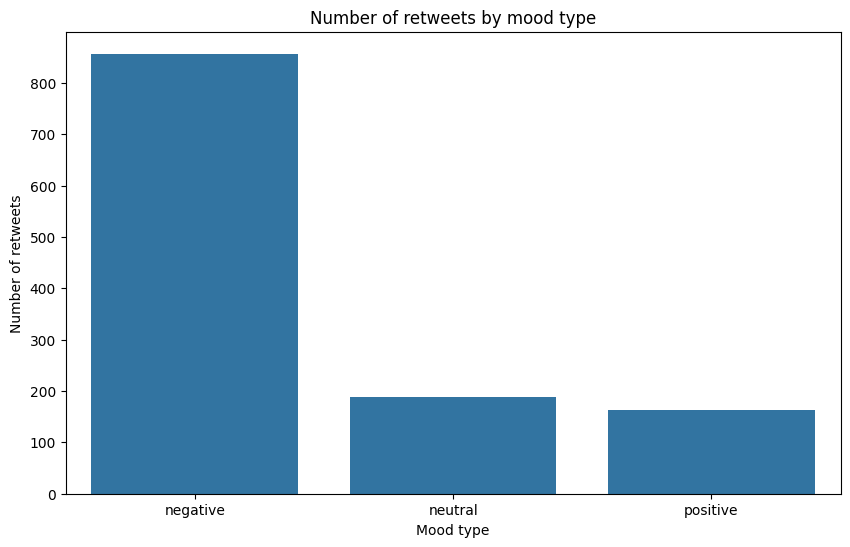

In [ ]:
#most people retweeted negative messages
# Group data by sentiment type and count the total number of retweets for each type
retweet_counts = df.groupby('airline_sentiment')['retweet_count'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='airline_sentiment', y='retweet_count', data=retweet_counts)
plt.title('Number of retweets by mood type')
plt.xlabel('Mood type')
plt.ylabel('Number of retweets')
plt.show()

#Distribution of reviews by time zone and mood

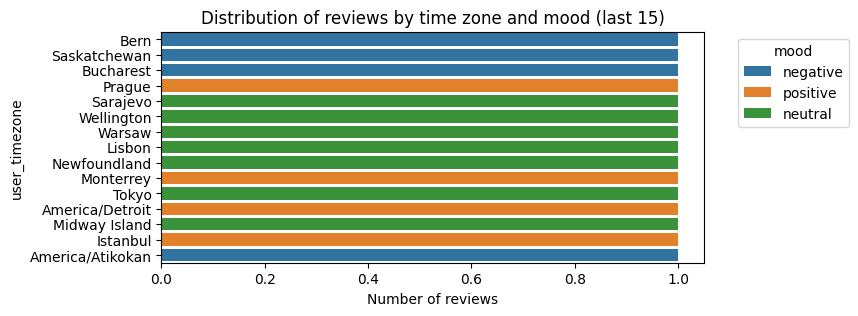

In [ ]:
recent_user_timezones = df['user_timezone'].value_counts().index[-15:]

plt.figure(figsize=(7, 3))
sns.countplot(y='user_timezone', hue='airline_sentiment', data=df[df['user_timezone'].isin(recent_user_timezones)])
plt.title('Distribution of reviews by time zone and mood (last 15)')
plt.xlabel('Number of reviews')
plt.ylabel('user_timezone')
plt.legend(title='mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


#Bucharest,Bern, Saskatchewan, America have negative reviews for 'Virgin America' airline;
# while Sarajevo,Lisbon, Warsaw have neutral reviews, and Prague, Monterrey have positive reviews

#thats all thanks